# House Prices

Predict the final price of each home when 79 explanatory variables describing almost every aspect of residential homes in Ames, Iowa.


First things first we import the needed libraries for our analysis.

In [49]:
#import some important libraries!
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Data Collecting

In [129]:
train = pd.read_csv("train.csv")

### Data Description

Let's see a few overall describtions of the dataset we have!

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

For a few features there's a number of null observation that we will deal with them later on this analysis.

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


For an overview of the data everything looks normal. Now we will try to go a little bit deeper in the analysis to realy see what's going on here.

### Data Cleaning
The first step is to clean the dataset, to handle the missing data and the outliers!

#### Missing Data

In [130]:
#count of missing data for every feature!
missing = train.isnull().sum().sort_values(ascending=False)
missing.head(25)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
YearRemodAdd       0
MSSubClass         0
Foundation         0
ExterCond          0
ExterQual          0
dtype: int64

Here are all the features with the number of missing observations. The usual approuch to deal with missing data is by filling the null with the average, but if we think about our data we figure out that there is no meaning to this solution! Why? We have here specific features to each individual house, and it's not logical to fill in the missing with an average, the house either have it or not! (e.g. there is a pool in the house or there isn't - we can't average that!)

The next step to think about is deleting the missing data, which in return may lead to bias or wrong analysis of the data. So, we will try to save a few features first.

The last three features 'Electrical', 'MasVnrType' and 'MasVnrArea' have less than 5% of missing data, so we will delete these observations and keep the variables.

In [131]:
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train = train.drop(train.loc[train['MasVnrArea'].isnull()].index)
train = train.drop(train.loc[train['MasVnrType'].isnull()].index)

Let's deal with 'PoolQC' and it's 1453 missing data!

We notice that 'PoolQC' have the same number of valid observation as 'PoolArea', so we predict that they are the same observations and we'll check out if the null observation in 'PoolQC' are the same observation in 'PoolArea' with zero as an input!
If what we think is actually right, we'll fill in the missing data with NA since it's not a numerical feature, instead of deleting all of the variable.

In [132]:
#check 'PoolQC' null data are the same as the 0 in 'PoolArea'
train[train['PoolQC'].notnull()].index==train[train['PoolArea']>0].index

array([ True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [133]:
#fill in the null with NA
train['PoolQC'] = train['PoolQC'].fillna('NA')

Same goes for 'FireplaceQu', we'll check if the null observations are the same ones with 0 in 'Fireplaces', and if it's TRUE then we'll fill in the missing with NA.

In [134]:
#check 'FireplaceQu' null data are the same as the 0 in 'Fireplaces'
all(train[train['FireplaceQu'].isnull()].index==train[train['Fireplaces']==0].index)

True

In [135]:
#fill in the null with NA
train['FireplaceQu'] = train['FireplaceQu'].fillna('NA')

Let's see the correlation between 'PoolQC' and 'PoolArea'. First we have to convert 'PoolQC' to a numerical variable!

We'll use mapping by dictionary and then plot the result vs. 'PoolArea'.

In [136]:
#convert to numerical
mapping = {'NA':0, 'Ex':4, 'Gd':3, 'TA':2, 'Fa':1,}
train = train.replace({'PoolQC': mapping})

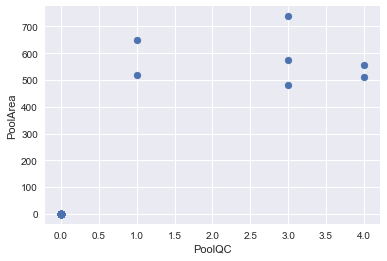

In [137]:
plt.scatter(train['PoolQC'], train['PoolArea']) 
plt.xlabel('PoolQC')
plt.ylabel('PoolArea')

In [138]:
#remarks ?!

Now for some of the remaining features we notice that they are related to the same variable, such as 'GarageCond' and 'GarageType' that in the big picture are related to a bigger variable, garage, and the info represented there is sufficient for us. In addition to that we notice that all the related features have exactly the same number of missing data. In this case we can delete these features without fearing for damaging our data.

The same goes for 'BsmtExposure', 'BsmtCond' and few others that are related to a bigger variable, basement.

In cases like ours, having two or more predictor variables with the same information (highly correlated), means that we have what's called as multicollinearity. Deleting these excess variables will solve this situation.

In [139]:
#deleting the duplicated features with missing data
missing = train.isnull().sum().sort_values(ascending=False)
train = train.drop(missing[missing>8].index,1)

#checking again for null after all the filteration 
train.isnull().sum().max()

0

We are done with missing data :D next !!

##### We will deal with the outliers after we analyze 'SalePrice'.

### Data Pre-Analysis
#### SalePrice Analysis
'SalePrice' is THE variable. In this analysis we'll want to find the correlation and predictions of this variable in regards of the others.
We'll start with a little describtion, and then we continue to correlations analysis

In [17]:
train['SalePrice'].describe()

count      1451.000000
mean     180624.101999
std       79312.128273
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Everything looks normal, even a bit cheaper than what we thought >.<' lucky americans!

/Users/HaiaK/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


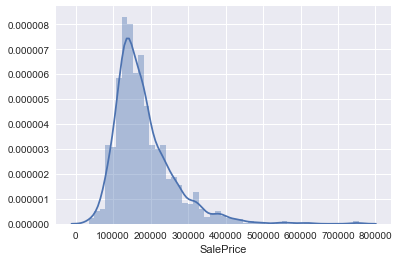

In [18]:
sns.distplot(train['SalePrice'])

/Users/HaiaK/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


AttributeError: 'AxesSubplot' object has no attribute 'add_axes'

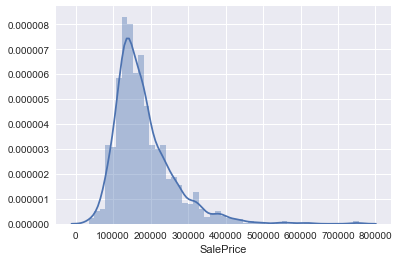

In [19]:
fig = sns.distplot(train['SalePrice'])


#axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
#axes1.plot(x, y, 'b')
#axes1.set_xlabel('X_label_axes2')
#axes1.set_ylabel('Y_label_axes2')
#axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
#axes2.plot(y, x, 'r')
#axes2.set_xlabel('X_label_axes2')
#axes2.set_ylabel('Y_label_axes2')
#axes2.set_title('Axes 2 Title');

NameError: name 'overview_data_x' is not defined

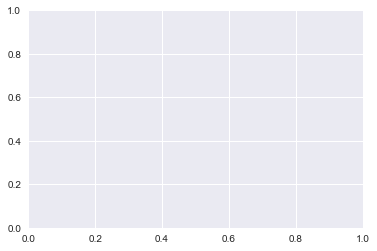

In [20]:
fig, ax = plt.subplots() # create a new figure with a default 111 subplot
ax.plot(overview_data_x, overview_data_y)

In [21]:
#    OZ     These are attempts to zoom in part of the graph, Ill do it later!!!

  We notics thats the graph deviate from the normal distribution, and has a positive skewness which means that many homes sold for less than the average.   
  We zoomed in on the last part of the graph # indicate that we have extreme Saleprice which infulence over all dist..
  Zoomin x over 500,000
  y = counts

#### Numerical features
Now we want to check the numerical features and their correlation to 'SalePrice'. We expect to find the most relevant variables (feature selection) and outliers in this section. Lets start!!

In [22]:
train.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,...,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,729.374225,56.933150,10507.808408,6.093728,5.579600,1971.092350,1984.760165,103.75672,442.274983,46.838043,...,46.422467,21.952447,3.430737,15.154376,2.776017,0.013094,43.758787,6.319090,2007.815300,180624.101999
std,421.737858,42.350366,9992.987081,1.381467,1.113415,30.190266,20.651334,181.10815,455.369276,161.777324,...,66.060150,61.108223,29.406940,55.917522,40.301212,0.204689,497.648467,2.700353,1.329376,79312.128273
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.500000,20.000000,7537.500000,5.000000,5.000000,1954.000000,1966.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,729.000000,50.000000,9477.000000,6.000000,5.000000,1972.000000,1993.000000,0.00000,381.000000,0.000000,...,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,1094.500000,70.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,707.000000,0.000000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,1474.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,4.000000,15500.000000,12.000000,2010.000000,755000.000000


In [23]:
#numeric features only
numeric = train._get_numeric_data()
numeric = numeric.drop(['SalePrice', 'Id'], 1)

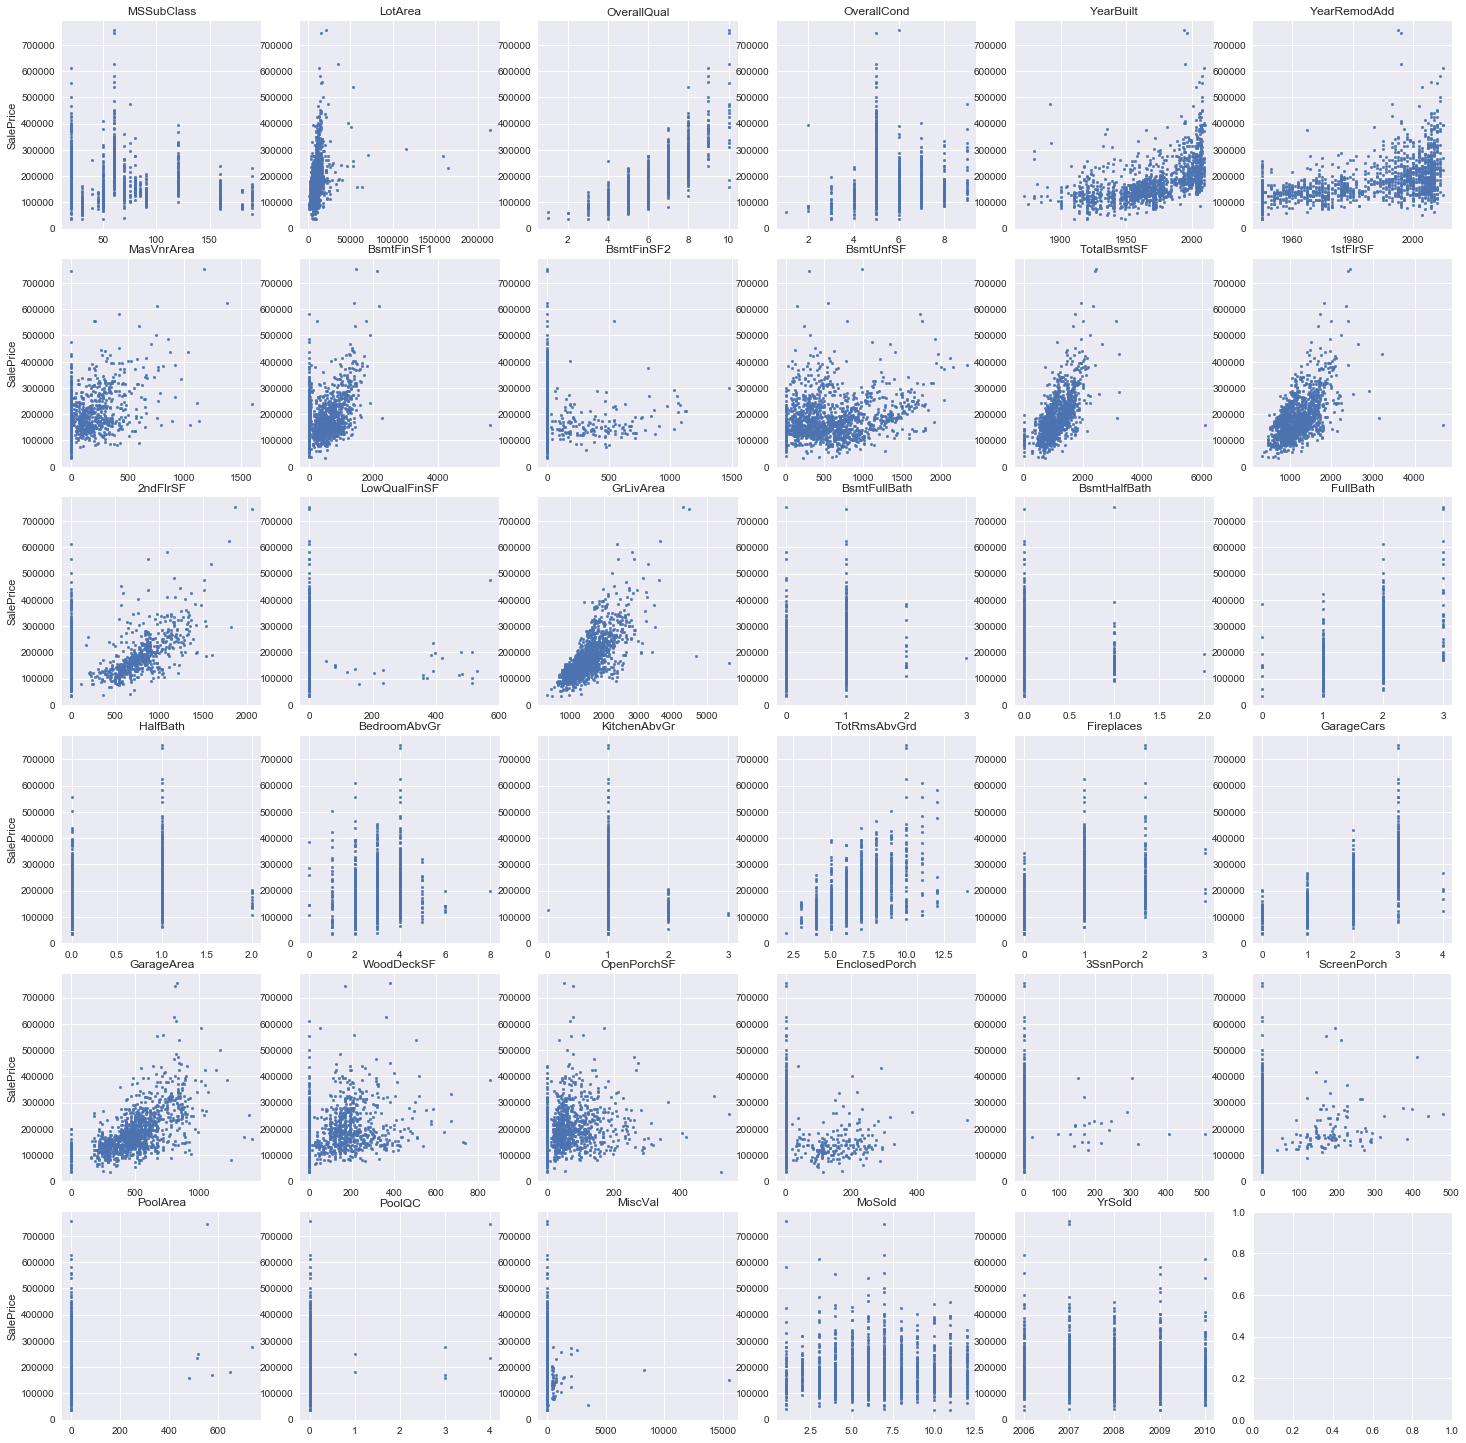

In [24]:
#correlations between all the numerics features vs. 'SalePrice'
fig,ax = plt.subplots(ncols=6, nrows=6, figsize=(20,20))
fig.tight_layout()

for i in range(0, 35):
    plt.subplot(6, 6, i+1)
    plt.scatter(numeric[numeric.columns[i]], train['SalePrice'], s=7)
    plt.title(numeric.columns[i])
    if i%6==0:
        plt.ylabel('SalePrice')

We notice some continuous numerical features and some discrete ones, and if we look closely we see that all of them make sense. For example 'MoSold', 'YrSold', 'Fireplaces', GarageCars', 'OverallQual' and more that obviously have a discrete number as a describtion.

In the mean while we will focus on the continuous features only.
In an overall look we see that the numerical features all have a positive correlation with 'SalePrice'.

Some of the figures we may find interesting are the ones between 'TotalBsmtSF', '1stFlrSf' and 'GrLiveArea' correlated with 'SalePrice'. If we think about it these three variables express partially the same thing! ('First Floor square feet', 'Above ground living area square feet' and 'Total square feet of basement area' (there wont be a basement bigger than the house it self)), so we'll deal with one and see if it will actually affect the two others!

In 'GrLiveArea' vs. 'SalePrice' graph, notice the linear positive relationship and the few outliers on the sides.

In [152]:
#a function that return the correlation between 'TotalBsmtSF', '1stFlrSf' and 'GrLiveArea' vs. 'SalePrice'
def graphs():
    fig,ax = plt.subplots(ncols=3, nrows=1, figsize=(30,10))
    fig.tight_layout()
    names = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF']
    a=25

    for i in range(0, 3):
        x = train[names[i]]
        y = train['SalePrice']
        plt.subplot(1, 3, i+1)
        
        fit = np.polyfit(x,y,1)
        fit_fn = np.poly1d(fit) #a function which takes in x and returns an estimate for y
        pearCo = np.corrcoef(x,y)[1,0]
        
        plt.scatter(x, y, s=50)
        plt.xlabel(names[i], fontsize=a)
        plt.plot(x, y, 'yo', x, fit_fn(x), label="r = %.4f"%(pearCo))
        plt.xticks(fontsize=a-5)
        plt.yticks(fontsize=a-5)
        plt.legend(loc=2, fontsize=a)
        if i%3==0:
            plt.ylabel('SalePrice', fontsize=a)

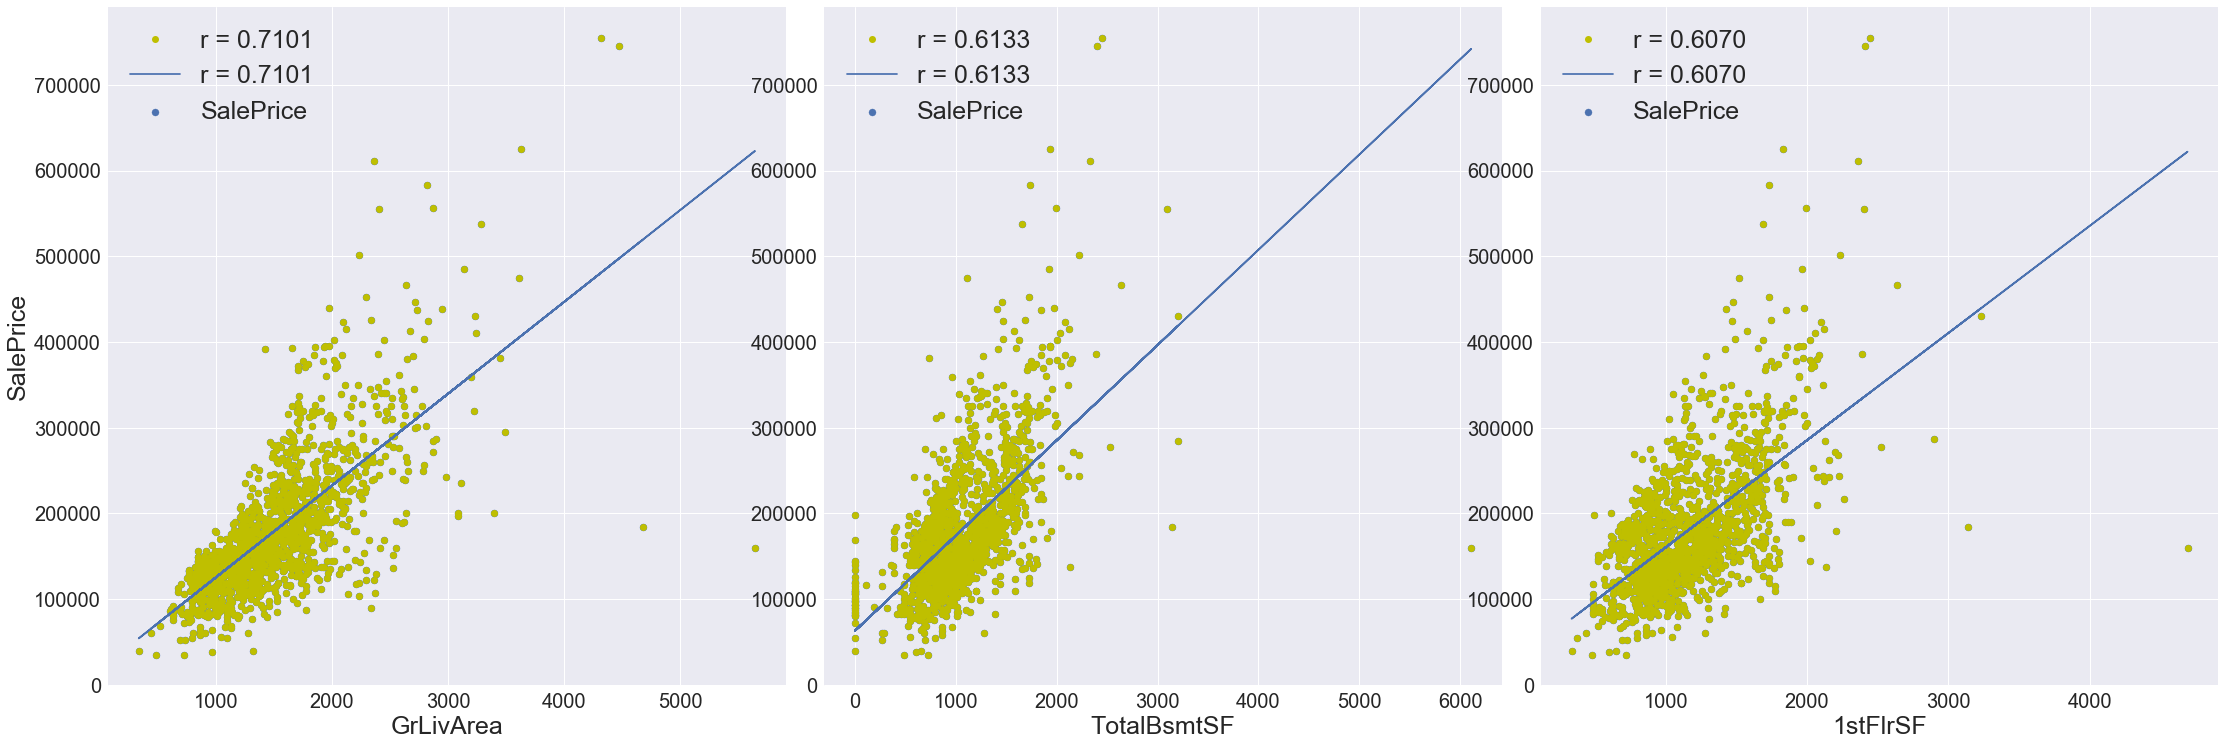

In [141]:
#zoom in to the three graphs
graphs()

There seems to be two extreme outliers on the bottom right, really large houses that sold for really cheap. More generally, the author of the dataset recommends removing 'any houses with more than 4000 square feet' from the dataset, thus deleting all the outliers presented in these graphs. We'll keep in mind the Pearson correlation coefficient we got here so we compare it after removing the outliers.

Reference : https://ww2.amstat.org/publications/jse/v19n3/decock.pdf

In [142]:
train = train[train.GrLivArea < 4000]

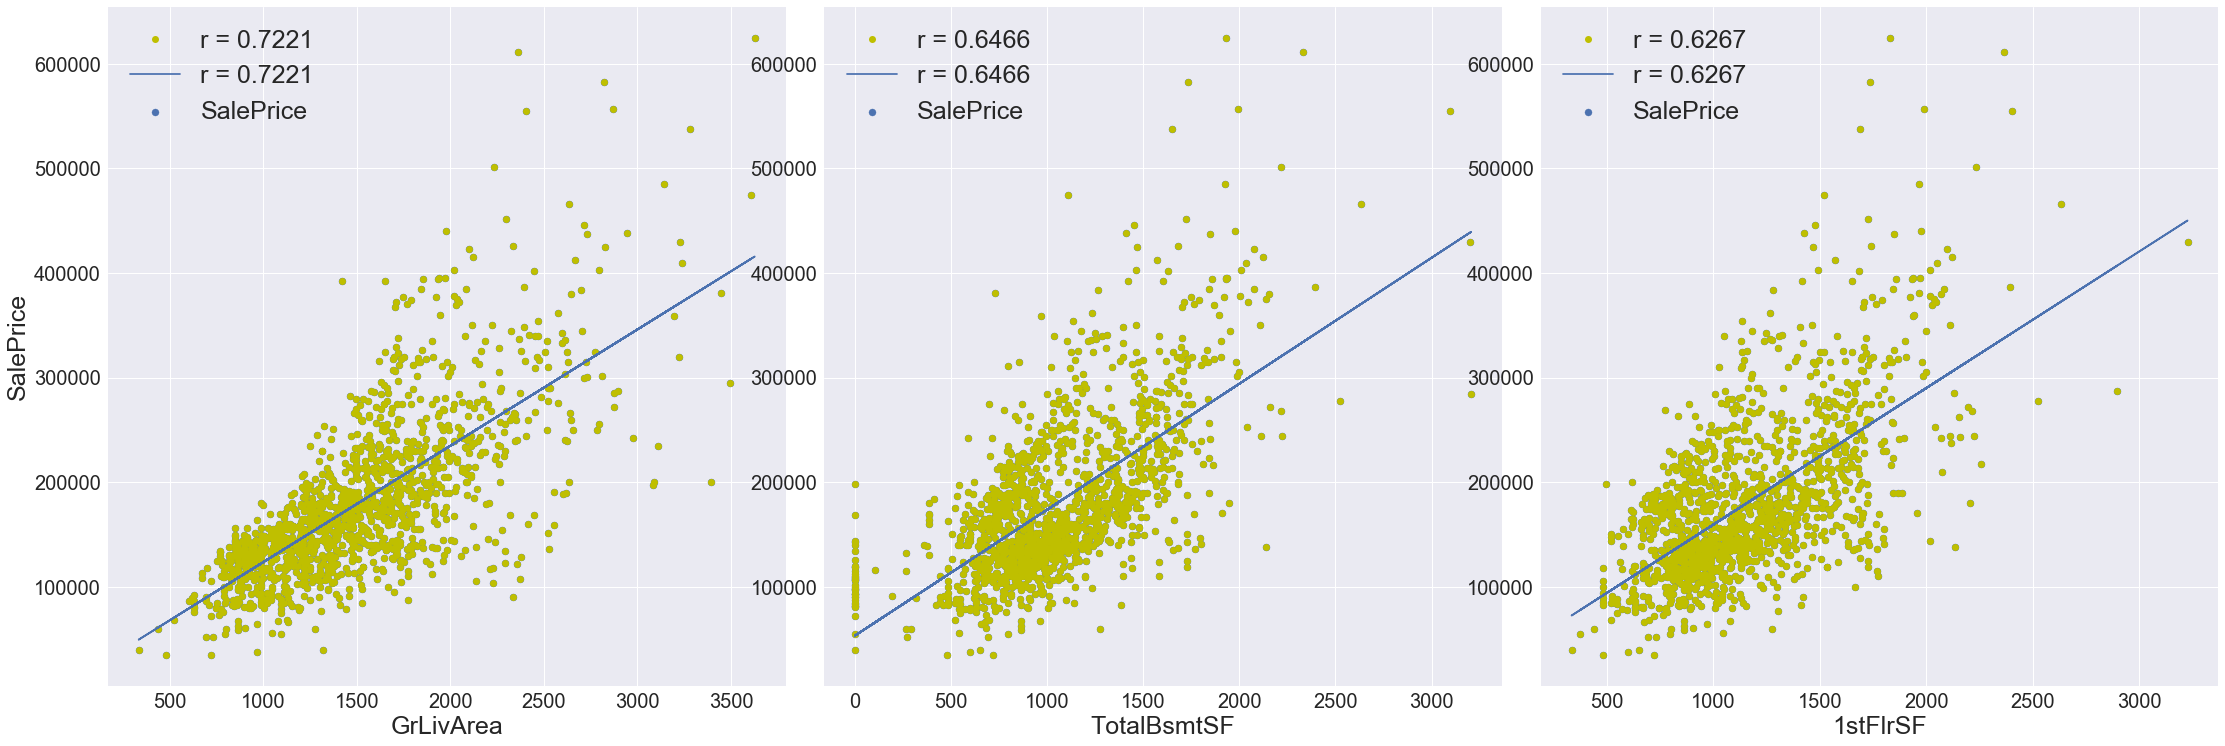

In [153]:
#the three graphs after removing houses bigger than 4000 square feet
graphs()

In [149]:
#remove from legened the other labels

#and about the regression line and pearson coeff ... is it the best fitted one ?

The graphs look a bit better and tightened, although we found new potential outliers but we will stop here with dealing with outliers. 
Secondly, we can see that the Pearson correlation coefficient got bigger after we removed the outliers (closer to 1 - stronger positive linear correlation).

What's next? 

Let's look at more variables and see if we can get something out of them!

Let's zoom in on 'YearBuilt' and 'SalePrice'

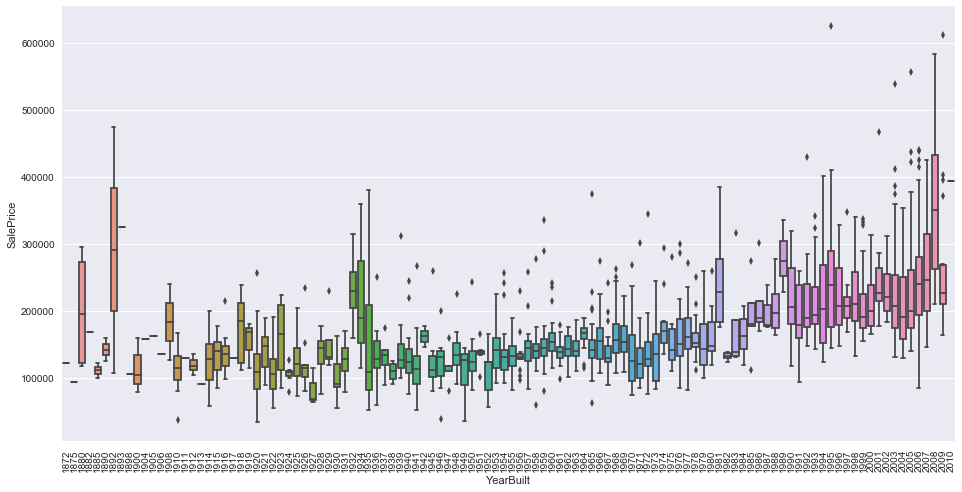

In [176]:
#boxplot 'YearBuilt' vs. 'SalePrice'

#trainCon = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)          to use it ?
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot('YearBuilt', 'SalePrice', data=train)
plt.xticks(rotation=90);

There is not a strong uniformal tendecy, but we can see that spending money on new houses is more likely than old ones. 
*Assuming of course that the currency didn't change over years and we can compare between the prices.

Let's zoom in now on 'OverallQual'

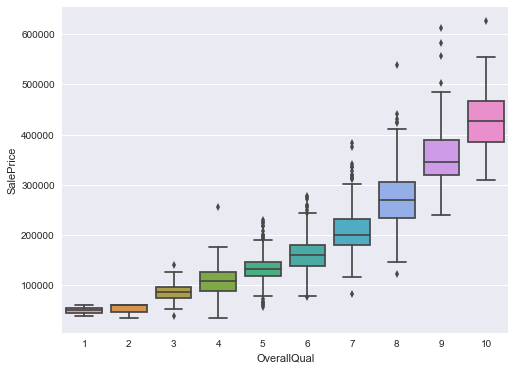

In [179]:
#boxplot 'OverallQual' vs. 'SalePrice'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot('OverallQual', 'SalePrice', data=train)

OK! Looks good, we see a strong positive correlation, the higher the quality the higher the price. Makes sense! 

Next..

Now this is a different way to get an overview of the variables and thier relationship - correlation matrix (heatmap) 

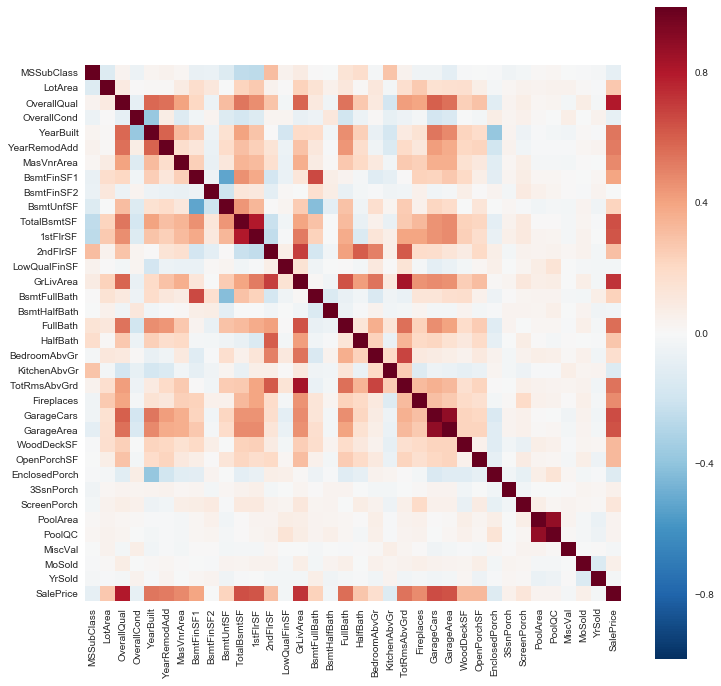

In [184]:
corr = train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

Alright, there are a few noticable red squares that got our attention immediately! '1stFlrSF' vs. 'TotalBsmtSF', 'TotRmsAbvGrd' vs. 'GrLivArea', 'GragaArea' vs. 'GarageCars', 'PoolQC' vs. 'PoolArea', 'OverallQual' vs. 'SalePrice', 'GrLivArea' vs. 'SalePrice' and few more that show a good relationship with 'SalePrice'.

Again, we see here some strong correlated variables that express partially the same thing! There is no garage area that fits 2 cars correlated with 5 garage cars, the same goes total rooms above ground and ground living area and such.

Let's do a close up on the top 7 most correlated variables!

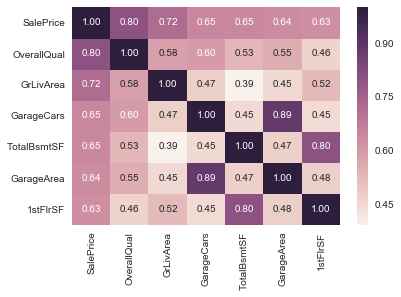

In [191]:
top5 = corr.nlargest(7, 'SalePrice')['SalePrice'].index
corcoef = np.corrcoef(train[top5].values.T)
sns.heatmap(corcoef, annot=True, fmt='.2f', yticklabels=top5.values, xticklabels=top5.values)

In [208]:
#remarks

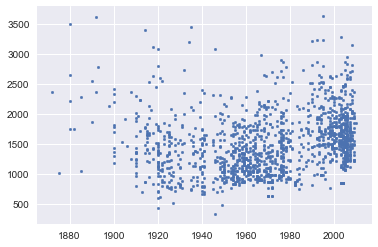

In [175]:
#year build vs sheta7 (meshtane dummy)
plt.scatter(train['YearBuilt'],train['GrLivArea'], s=7)
#anything interesting ? do it in a different way ?

In [145]:
#something to do with discrete numbers ?? write something on it

#### Categorical features

It's time for categorical features. We will start by converting the categorical features to dummy variables.

In [93]:
#changing catagorical to dummy variables
new_df = train.select_dtypes(include = ["object"])   #sperate to non numeric variables
new_train = train.select_dtypes(exclude = ["object"]) #sperate only to numeric variables
df_new = pd.get_dummies(new_df)#([new_df,], axis=1)   #generating dummies 4 non numeric
new_train = pd.concat([new_train,df_new],axis=1)      #concat the new_train and the Dummies 2 1 dataframe.

In [95]:
train.shape

(1460, 81)

In [96]:
new_train.shape

(1460, 290)

In [97]:
new_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,0,0,0,1,0,0,0,0,1,0
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,0,0,0,1,0,0,0,0,1,0
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,0,0,0,1,0,0,0,0,1,0
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,0,0,0,1,1,0,0,0,0,0
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,0,0,1,0,0,0,0,1,0


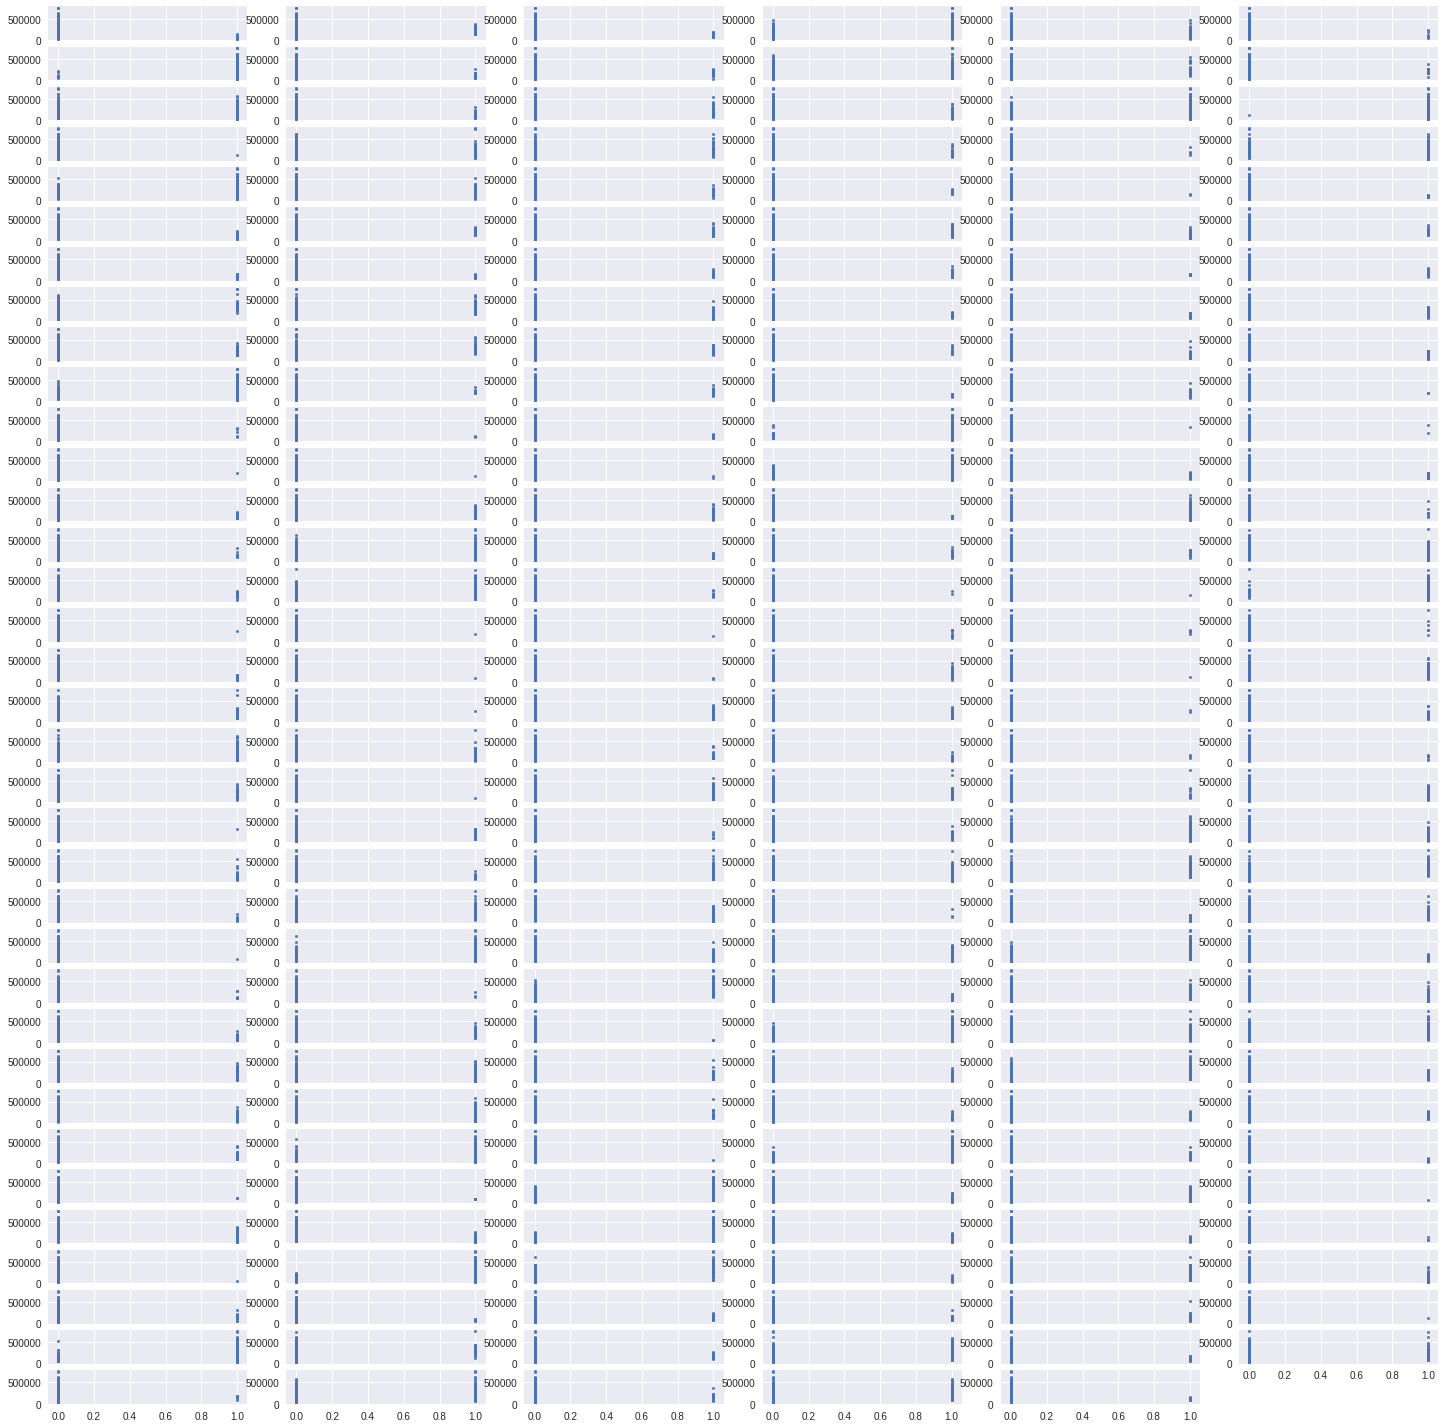

In [98]:

fig,ax = plt.subplots(ncols=6, nrows=7, figsize=(20,20))
fig.tight_layout()


for i in range(0, 209):
    plt.subplot(35, 6, i+1)
    plt.scatter(df_new[df_new.columns[i]], train['SalePrice'], s=7)

In [103]:
lm.regerses

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [105]:
a = np.cov(df_new)

In [109]:
abs(a[1])>0.5

array([], dtype=float64)

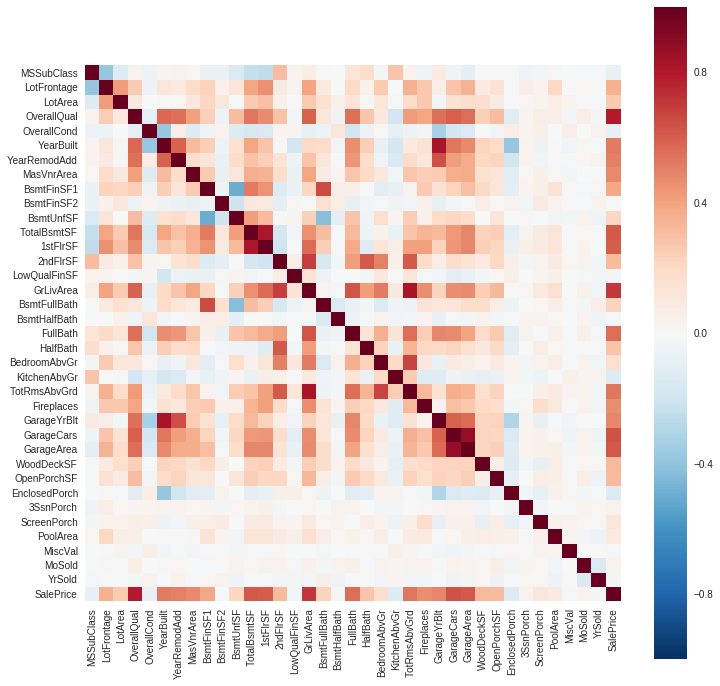

In [110]:
corr = new_train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

#remark???